In [1]:
import pandas as pd

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns
%matplotlib inline

In [2]:
import requests
from zipfile import ZipFile

#URL of the zip file on my GitHub
zip_url = "https://github.com/annycruzsalcedo/datasets/raw/main/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv.zip"

#download the zip file
response = requests.get(zip_url)
zip_filename = "Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv.zip"

with open(zip_filename, "wb") as f:
    f.write(response.content)

#extract the content of the zip file
with ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extract("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv", 
                    path="extracted_data")  # Specify the target folder

#read the extracted CSV into a Pandas DataFrame
csv_file_path = "extracted_data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv"
df = pd.read_csv(csv_file_path)

#now 'df' contains my data from the CSV file
print(df.head())

   YearStart  YearEnd LocationAbbr LocationDesc  \
0       2020     2020           US     National   
1       2014     2014           GU         Guam   
2       2013     2013           US     National   
3       2013     2013           US     National   
4       2015     2015           US     National   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System        Physical Activity   
1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System        Physical Activity   

                          Topic  \
0  Physical Activity - Behavior   
1       Obesity / Weight Status   
2       Obesity / Weight Status   
3       Obesity / Weight Status   
4  Physical Activity - Behavior   

                                     

In [3]:
#Data Exploration
df.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
88624,2021,2021,ND,North Dakota,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.47531977900047, -100.11842104899966)",FV,FV1,Q019,VALUE,38,Gender,Male,GEN,MALE
88625,2021,2021,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$35,000 - $49,999",INC,INC3550
88626,2021,2021,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(44.39319117400049, -89.81637074199966)",PA,PA1,Q047,VALUE,55,Income,"$75,000 or greater",INC,INC75PLUS
88627,2021,2021,UT,Utah,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,NaN,Value,...,"(39.360700171000474, -111.58713063499971)",FV,FV1,Q018,VALUE,49,Income,"$50,000 - $74,999",INC,INC5075
88628,2021,2021,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Income,Data not reported,INC,INCNR


In [4]:
#data exploration
df.shape

(88629, 33)

In [5]:
#data exploration
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [6]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   88629 non-null  int64  
 1   YearEnd                     88629 non-null  int64  
 2   LocationAbbr                88629 non-null  object 
 3   LocationDesc                88629 non-null  object 
 4   Datasource                  88629 non-null  object 
 5   Class                       88629 non-null  object 
 6   Topic                       88629 non-null  object 
 7   Question                    88629 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             88629 non-null  object 
 10  Data_Value                  79851 non-null  float64
 11  Data_Value_Alt              79851 non-null  float64
 12  Data_Value_Footnote_Symbol  8778 non-null   object 
 13  Data_Value_Footnote         877

In [7]:
#identify the total amount of missing values
df.isnull().sum().sum()

737063

<Axes: >

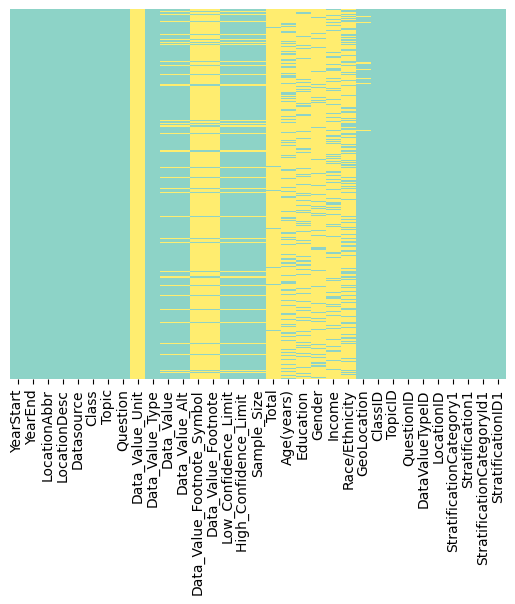

In [10]:
#visualize which columns have missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Set3')

In [11]:
#identify amount of missing values per column
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               88629
Data_Value_Type                   0
Data_Value                     8778
Data_Value_Alt                 8778
Data_Value_Footnote_Symbol    79851
Data_Value_Footnote           79851
Low_Confidence_Limit           8778
High_Confidence_Limit          8778
Sample_Size                    8778
Total                         85464
Age(years)                    69639
Education                     75969
Gender                        82299
Income                        66474
Race/Ethnicity                63309
GeoLocation                    1652
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [12]:
#data cleaning
missing_values = ["Data not reported"]
df = pd.read_csv(csv_file_path,
na_values = missing_values)
df.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
88624,2021,2021,ND,North Dakota,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.47531977900047, -100.11842104899966)",FV,FV1,Q019,VALUE,38,Gender,Male,GEN,MALE
88625,2021,2021,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$35,000 - $49,999",INC,INC3550
88626,2021,2021,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(44.39319117400049, -89.81637074199966)",PA,PA1,Q047,VALUE,55,Income,"$75,000 or greater",INC,INC75PLUS
88627,2021,2021,UT,Utah,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,NaN,Value,...,"(39.360700171000474, -111.58713063499971)",FV,FV1,Q018,VALUE,49,Income,"$50,000 - $74,999",INC,INC5075
88628,2021,2021,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Income,NaN,INC,INCNR


In [13]:
#filter random row to see its complete data
df.iloc[88628]

YearStart                                                                  2021
YearEnd                                                                    2021
LocationAbbr                                                                 US
LocationDesc                                                           National
Datasource                           Behavioral Risk Factor Surveillance System
Class                                                         Physical Activity
Topic                                              Physical Activity - Behavior
Question                      Percent of adults who engage in no leisure-tim...
Data_Value_Unit                                                             NaN
Data_Value_Type                                                           Value
Data_Value                                                                 19.0
Data_Value_Alt                                                             19.0
Data_Value_Footnote_Symbol              

In [14]:
#identify the new total amount of missing values
df.isnull().sum().sum()

743393

In [15]:
#drop missing values of 'Data_Value' column
df = df.dropna(subset=['Data_Value'])
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,NaN,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [16]:
#verify Data_Value column has non-null values
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               79851
Data_Value_Type                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    79851
Data_Value_Footnote           79851
Low_Confidence_Limit              0
High_Confidence_Limit             0
Sample_Size                       0
Total                         76703
Age(years)                    60963
Education                     67259
Gender                        73555
Income                        60968
Race/Ethnicity                62955
GeoLocation                    1652
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [20]:
#create a new DataFrame with desired columns
new_df = df[['YearEnd', 'LocationAbbr', 'LocationDesc', 'Topic', 'Question','Data_Value', 'Sample_Size', 
                      'TopicID', 'QuestionID', 'LocationID']]
new_df.head()

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Sample_Size,TopicID,QuestionID,LocationID
0,2020,US,National,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,30.6,31255.0,PA1,Q047,59
1,2014,GU,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.3,842.0,OWS1,Q036,66
2,2013,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,62562.0,OWS1,Q036,59
3,2013,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.7,60069.0,OWS1,Q037,59
4,2015,US,National,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,26.6,30904.0,PA1,Q045,59


In [21]:
#rename YearEnd column
new_df = new_df.rename(columns={"YearEnd": "Year"})
new_df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'Topic', 'Question',
       'Data_Value', 'Sample_Size', 'TopicID', 'QuestionID', 'LocationID'],
      dtype='object')

In [22]:
#group by 'Year' and count occurrences of 'LocationDesc'
new_df.groupby(['Year'])['LocationDesc'].count()

Year
2011     9307
2012     4000
2013     9257
2014     4114
2015     9497
2016     4177
2017    12329
2018     4115
2019    12051
2020     4118
2021     6886
Name: LocationDesc, dtype: int64

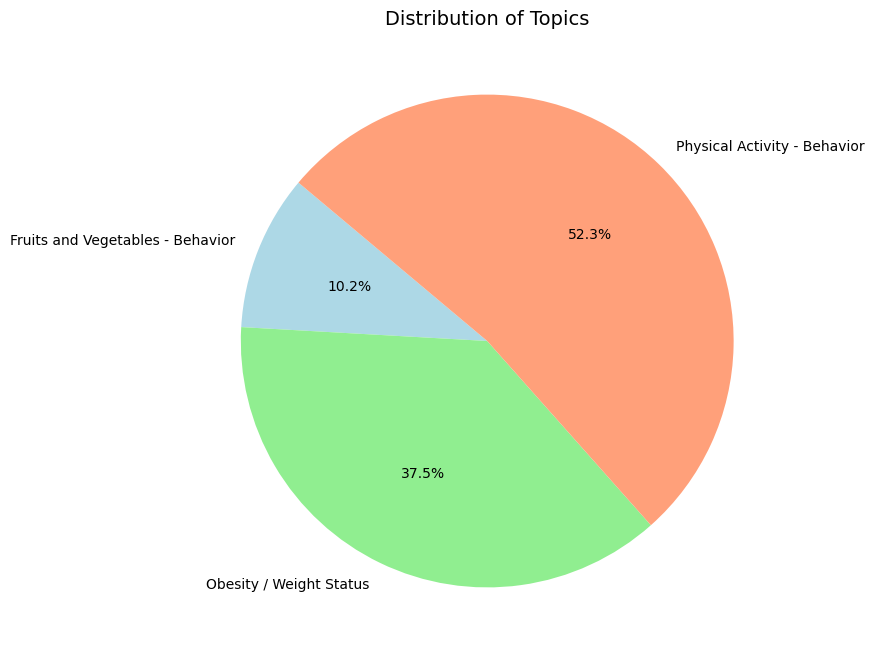

In [58]:
#group by 'Topic' and count occurrences of 'LocationDesc'
grouped_counts = new_df.groupby(['Topic'])['LocationDesc'].count()

#define custom colors
custom_colors = ['lightblue', 'lightgreen', 'lightsalmon']

#create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(grouped_counts, labels=grouped_counts.index, colors=custom_colors,
        autopct='%1.1f%%', startangle=140)

#add a title
plt.title('Distribution of Topics', fontsize=14)

#show the plot
plt.show()

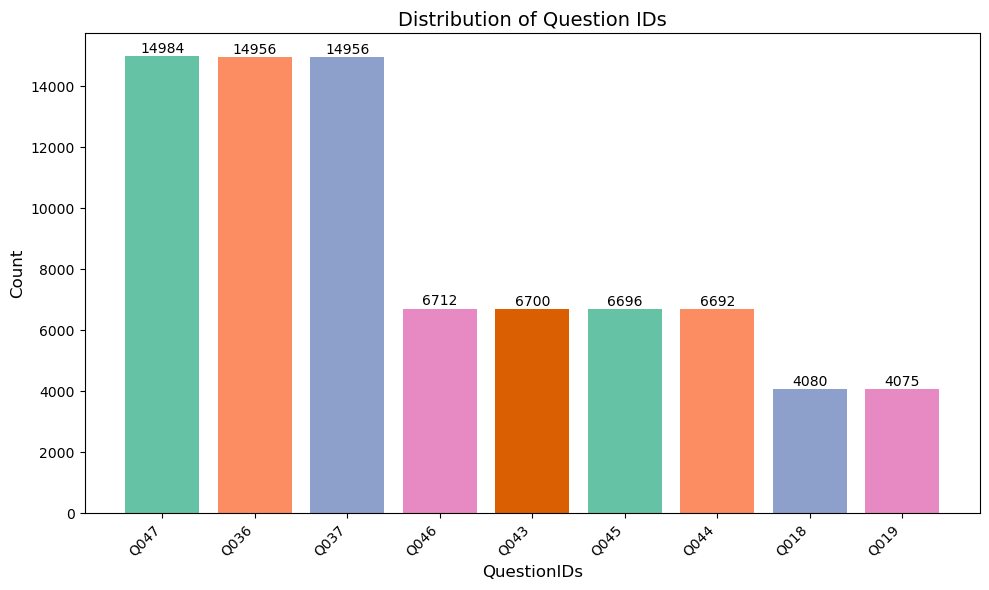

In [71]:
#group by 'QuestionID' and count occurrences of 'LocationDesc'
grouped_counts2 = new_df.groupby(['QuestionID'])['LocationDesc'].count()

#gort data by count in descending order
sorted_counts = grouped_counts2.sort_values(ascending=False)

#get the sorted topic labels and their corresponding counts
sorted_question_id = sorted_counts.index
sorted_counts_values = sorted_counts.values

#define custom colors
custom_colors2 = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3',  '#d95f02', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

#create a histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_question_id, sorted_counts_values, color=custom_colors2)

#add counts as text above each bar
for q_id, count in zip(sorted_question_id, sorted_counts_values):
    plt.text(q_id, count + 2, str(count), ha='center', va='bottom', fontsize=10)

#customize labels and title
plt.xlabel('QuestionIDs', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Question IDs', fontsize=14)

#rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

#show the plot
plt.tight_layout()
plt.show()

In [78]:
#identify 'Q047'
new_df.loc[new_df['QuestionID']=='Q047']

,Year,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Sample_Size,TopicID,QuestionID,LocationID
0,2020,US,National,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,30.6,31255.0,PA1,Q047,59
8,2015,PR,Puerto Rico,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,38.1,421.0,PA1,Q047,72
10,2015,GU,Guam,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,30.5,559.0,PA1,Q047,66
13,2012,WY,Wyoming,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,32.3,484.0,PA1,Q047,56
14,2020,DE,Delaware,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,15.3,65.0,PA1,Q047,10
...,...,...,...,...,...,...,...,...,...,...
88607,2021,NH,New Hampshire,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,21.5,3638.0,PA1,Q047,33
88616,2021,NJ,New Jersey,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,34.1,1641.0,PA1,Q047,34
88625,2021,PR,Puerto Rico,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,37.4,347.0,PA1,Q047,72
88626,2021,WI,Wisconsin,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,11.8,850.0,PA1,Q047,55


In [79]:
#create new DataFrame with desired topic to focus on
desired_topic = new_df[new_df['Topic'].str.contains('Obesity / Weight Status')]
desired_topic

,Year,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Sample_Size,TopicID,QuestionID,LocationID
1,2014,GU,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.3,842.0,OWS1,Q036,66
2,2013,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,62562.0,OWS1,Q036,59
3,2013,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.7,60069.0,OWS1,Q037,59
6,2012,WY,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,48.5,69.0,OWS1,Q037,56
7,2012,DC,District of Columbia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.6,243.0,OWS1,Q036,11
...,...,...,...,...,...,...,...,...,...,...
88610,2021,LA,Louisiana,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,934.0,OWS1,Q037,22
88612,2021,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.2,40121.0,OWS1,Q036,59
88615,2021,VT,Vermont,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.6,1372.0,OWS1,Q037,50
88618,2021,ND,North Dakota,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,36.0,1859.0,OWS1,Q037,38


In [80]:
#create new DataFrame with desired location 1
df2 = desired_topic[desired_topic['LocationAbbr']=='NY']
df2

,Year,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Sample_Size,TopicID,QuestionID,LocationID
41,2016,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,25.9,14316.0,OWS1,Q036,36
561,2018,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.0,6866.0,OWS1,Q036,36
564,2018,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.3,1982.0,OWS1,Q037,36
579,2018,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.4,75.0,OWS1,Q037,36
580,2018,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.9,15565.0,OWS1,Q036,36
...,...,...,...,...,...,...,...,...,...,...
88294,2021,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.5,3146.0,OWS1,Q036,36
88361,2021,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,25.8,12592.0,OWS1,Q036,36
88380,2021,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.9,3579.0,OWS1,Q037,36
88406,2021,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.2,3221.0,OWS1,Q037,36


In [84]:
#verify missing values
df2.isnull().sum().sum()

0

In [85]:
#calculate stats for df2
df2.groupby(['Question'])['Data_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Question,,,,,,,,
Percent of adults aged 18 years and older who have an overweight classification,289.0,35.030104,3.929654,17.7,33.1,35.4,37.5,43.9
Percent of adults aged 18 years and older who have obesity,289.0,26.494464,5.915543,7.8,24.0,27.0,30.5,40.4


In [135]:
#calculate mean by year
barplot_obesity_NY = df2.loc[df2['Question']=='Percent of adults aged 18 years and older who have obesity']
barplot_obesity_NY = barplot_obesity_NY.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]
barplot_obesity_NY.sort_values(by='Data_Value', ascending=False)

/var/folders/dc/d37ld4p92t9c4rj6xpd897s40000gn/T/ipykernel_61854/2515122520.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot_obesity_NY = barplot_obesity_NY.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]


,Year,Data_Value
10,2021,30.025926
7,2018,28.353571
8,2019,27.618519
3,2014,27.068000
9,2020,26.548148
5,2016,25.870370
6,2017,25.765385
4,2015,25.580769
2,2013,25.261538
0,2011,24.856000


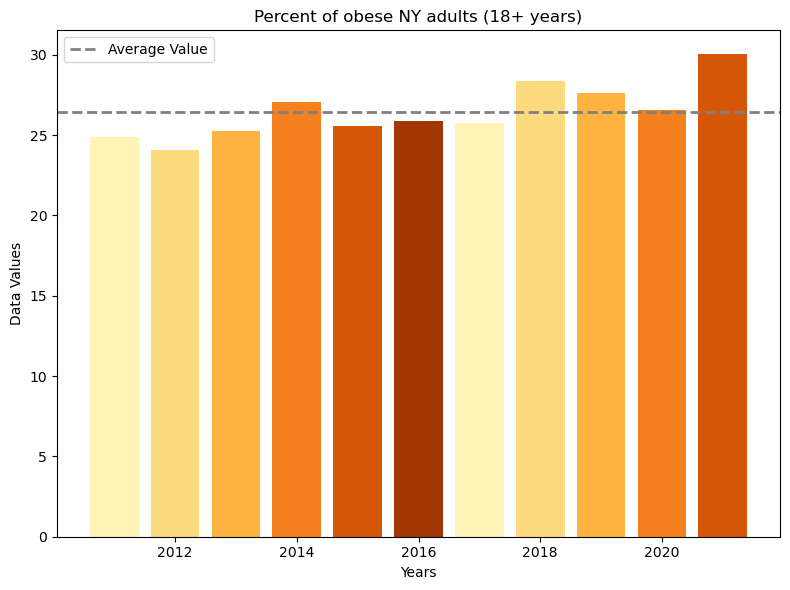

In [132]:
#vizualize data in chart
plt.figure(figsize=(8,6), tight_layout=True)
colors = sns.color_palette('YlOrBr')
ax = plt.bar(barplot_obesity_NY['Year'], barplot_obesity_NY['Data_Value'], color=colors[:11])
plt.xlabel('Years')
plt.ylabel('Data Values')
plt.title('Percent of obese NY adults (18+ years)')

#calculate the average value
average_value = barplot_obesity_NY['Data_Value'].mean()

#cdd a single line for the average value
plt.axhline(average_value, color='gray', linestyle='--', linewidth=2, label='Average Value')

#show the legend
plt.legend(loc='upper left')
plt.show()

In [103]:
#calculate mean by year
barplot_overweight_NY = df2.loc[df2['Question']=='Percent of adults aged 18 years and older who have an overweight classification']
barplot_overweight_NY = barplot_overweight_NY.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]
barplot_overweight_NY.sort_values(by='Data_Value', ascending=False)

/var/folders/dc/d37ld4p92t9c4rj6xpd897s40000gn/T/ipykernel_61854/2041595764.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot_overweight_NY = barplot_overweight_NY.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]


,Year,Data_Value
1,2012,36.932000
2,2013,35.876923
8,2019,35.637037
9,2020,35.600000
0,2011,35.352000
6,2017,34.969231
5,2016,34.518519
7,2018,34.478571
10,2021,34.437037
4,2015,33.888462


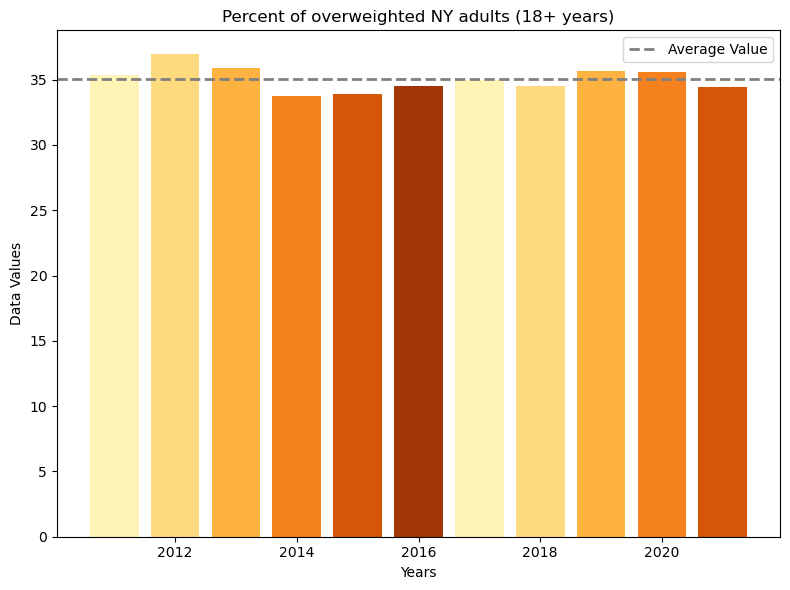

In [150]:
#vizualize data in chart
plt.figure(figsize=(8,6), tight_layout=True)
colors = sns.color_palette('YlOrBr')
ax = plt.bar(barplot_overweight_NY['Year'], barplot_overweight_NY['Data_Value'], color=colors[:11])
plt.xlabel('Years')
plt.ylabel('Data Values')
plt.title('Percent of overweighted NY adults (18+ years)')

#calculate the average value
average_value = barplot_overweight_NY['Data_Value'].mean()

#add a single line for the average value
plt.axhline(average_value, color='gray', linestyle='--', linewidth=2, label='Average Value')

#show the legend
plt.legend(loc='upper right')
plt.show()

In [136]:
#create new DataFrame with desired location 2
df3 = desired_topic[desired_topic['LocationAbbr']=='US']
df3

,Year,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Sample_Size,TopicID,QuestionID,LocationID
2,2013,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,62562.0,OWS1,Q036,59
3,2013,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.7,60069.0,OWS1,Q037,59
12,2011,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.4,6649.0,OWS1,Q036,59
21,2012,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.1,120032.0,OWS1,Q037,59
28,2013,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.5,27737.0,OWS1,Q036,59
...,...,...,...,...,...,...,...,...,...,...
88500,2021,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.3,57677.0,OWS1,Q036,59
88546,2021,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.9,3269.0,OWS1,Q037,59
88586,2021,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,36.4,28887.0,OWS1,Q037,59
88609,2021,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.9,57677.0,OWS1,Q037,59


In [137]:
#verify missing values
df3.isnull().sum().sum()

0

In [138]:
#calculate stats for df3
df3.groupby(['Question'])['Data_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Question,,,,,,,,
Percent of adults aged 18 years and older who have an overweight classification,308.0,34.637013,3.170167,25.0,32.900,35.05,36.8,42.1
Percent of adults aged 18 years and older who have obesity,308.0,30.120455,6.257853,8.7,27.575,31.00,34.0,42.9


In [140]:
#calculate mean by year
barplot_obesity_US = df3.loc[df3['Question']=='Percent of adults aged 18 years and older who have obesity']
barplot_obesity_US = barplot_obesity_US.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]
barplot_obesity_US.sort_values(by='Data_Value', ascending=False)

/var/folders/dc/d37ld4p92t9c4rj6xpd897s40000gn/T/ipykernel_61854/474166957.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot_obesity_US = barplot_obesity_US.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]


,Year,Data_Value
10,2021,33.803571
9,2020,32.414286
8,2019,32.017857
7,2018,31.339286
6,2017,30.442857
5,2016,29.817857
4,2015,29.085714
3,2014,28.907143
2,2013,28.475000
1,2012,27.657143


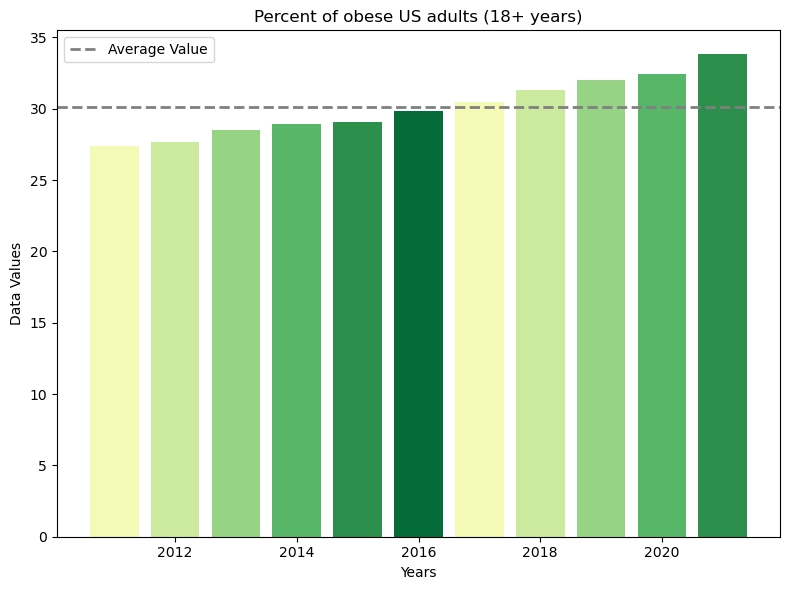

In [149]:
#vizualize data in chart
plt.figure(figsize=(8,6), tight_layout=True)
colors = sns.color_palette('YlGn')
ax = plt.bar(barplot_obesity_US['Year'], barplot_obesity_US['Data_Value'], color=colors[:11])
plt.xlabel('Years')
plt.ylabel('Data Values')
plt.title('Percent of obese US adults (18+ years)')

#calculate the average value
average_value = barplot_obesity_US['Data_Value'].mean()

#add a single line for the average value
plt.axhline(average_value, color='gray', linestyle='--', linewidth=2, label='Average Value')

#show the legend
plt.legend(loc='upper left')
plt.show()

In [142]:
#calculate mean by year
barplot_overweight_US = df3.loc[df3['Question']=='Percent of adults aged 18 years and older who have an overweight classification']
barplot_overweight_US = barplot_overweight_US.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]
barplot_overweight_US.sort_values(by='Data_Value', ascending=False)

/var/folders/dc/d37ld4p92t9c4rj6xpd897s40000gn/T/ipykernel_61854/1275378493.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  barplot_overweight_US = barplot_overweight_US.groupby(['Year'],as_index=False).mean()[['Year', 'Data_Value']]


,Year,Data_Value
0,2011,35.296429
4,2015,35.221429
1,2012,35.210714
2,2013,34.892857
5,2016,34.496429
6,2017,34.496429
8,2019,34.485714
3,2014,34.428571
7,2018,34.417857
9,2020,34.171429


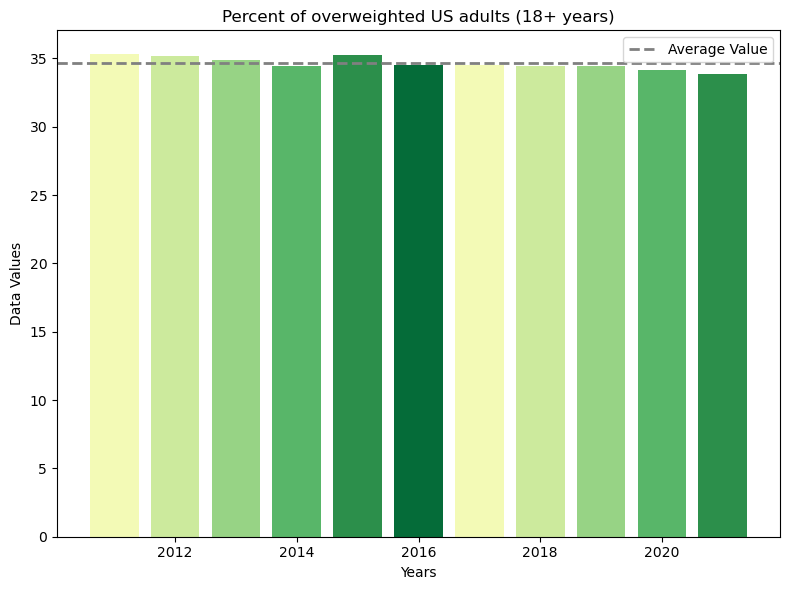

In [144]:
#vizualize data in chart
plt.figure(figsize=(8,6), tight_layout=True)
colors = sns.color_palette('YlGn')
ax = plt.bar(barplot_overweight_US['Year'], barplot_overweight_US['Data_Value'], color=colors[:11])
plt.xlabel('Years')
plt.ylabel('Data Values')
plt.title('Percent of overweighted US adults (18+ years)')

#calculate the average value
average_value = barplot_overweight_US['Data_Value'].mean()

#add a single line for the average value
plt.axhline(average_value, color='gray', linestyle='--', linewidth=2, label='Average Value')

#show the legend
plt.legend(loc='upper right')
plt.show()

In [147]:
#create new DataFrame with the data of overweighted adults in NY & the US
lineplot1 = pd.DataFrame({'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021
                                  ],
                    
                   'NY': [35.352000, 36.932000, 35.876923, 33.716000, 33.888462, 34.518519, 34.969231, 34.478571, 
                          35.637037, 35.600000, 34.437037],
                    
                   'US': [35.296429, 35.210714, 34.892857, 34.428571, 35.221429, 34.496429, 34.496429, 34.417857, 
                          34.485714, 34.171429, 33.889286
                          ]})
 
#print DataFrame
display(lineplot1)

,Year,NY,US
0,2011,35.352000,35.296429
1,2012,36.932000,35.210714
2,2013,35.876923,34.892857
3,2014,33.716000,34.428571
4,2015,33.888462,35.221429
5,2016,34.518519,34.496429
6,2017,34.969231,34.496429
7,2018,34.478571,34.417857
8,2019,35.637037,34.485714
9,2020,35.600000,34.171429


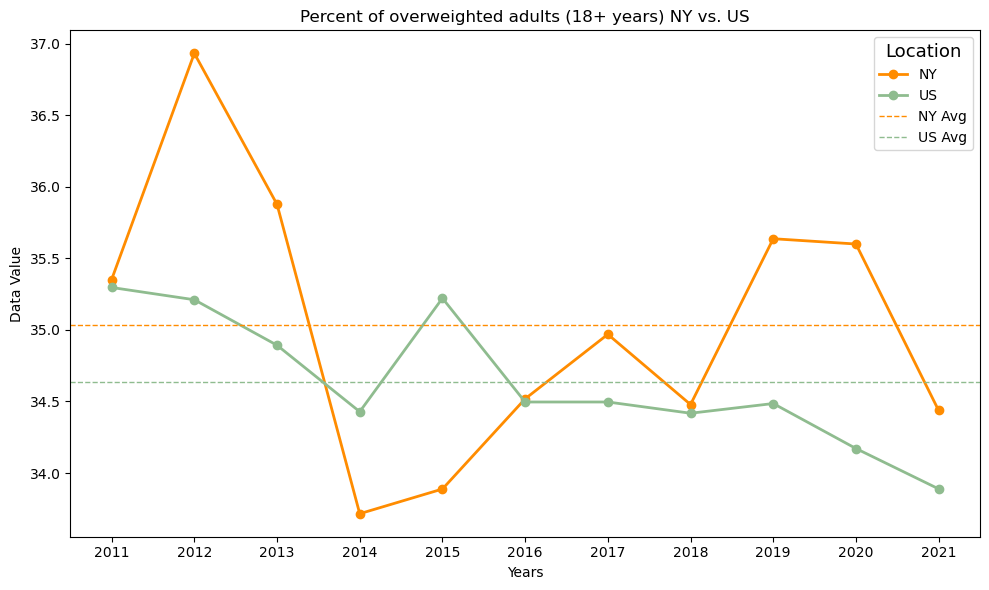

In [182]:
#vizualize previous data
#extract data from the DataFrame
years = lineplot1['Year']
ny_data = lineplot1['NY']
us_data = lineplot1['US']

plt.figure(figsize=(10, 6), tight_layout=True)
#plotting
plt.plot(years, ny_data, 'o-', label='NY', linewidth=2, color='darkorange')
plt.plot(years, us_data, 'o-', label='US', linewidth=2, color='darkseagreen')

#calculate the average values
ny_avg = ny_data.mean()
us_avg = us_data.mean()

#add horizontal lines for the averages
plt.axhline(y=ny_avg, color='darkorange', linestyle='--', label='NY Avg', linewidth=1)
plt.axhline(y=us_avg, color='darkseagreen', linestyle='--', label='US Avg', linewidth=1)

#customization
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Data Value')
plt.title('Percent of overweighted adults (18+ years) NY vs. US')
plt.legend(title='Location', title_fontsize=13)

plt.show()

In [157]:
#create new DataFrame with the data of obese adults in NY & the US
#create data frame
lineplot2 = pd.DataFrame({'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021
                                  ],
                    
                   'NY': [24.856000, 24.056000, 25.261538, 27.068000, 25.580769, 25.870370, 25.765385, 28.353571, 
                          27.618519, 26.548148, 30.025926],
                    
                   'US': [27.364286, 27.657143, 28.475000, 28.907143, 29.085714, 29.817857, 30.442857, 31.339286, 
                          32.017857, 32.414286, 33.803571
                          ]})
 
#print DataFrame
display(lineplot2)

,Year,NY,US
0,2011,24.856000,27.364286
1,2012,24.056000,27.657143
2,2013,25.261538,28.475000
3,2014,27.068000,28.907143
4,2015,25.580769,29.085714
5,2016,25.870370,29.817857
6,2017,25.765385,30.442857
7,2018,28.353571,31.339286
8,2019,27.618519,32.017857
9,2020,26.548148,32.414286


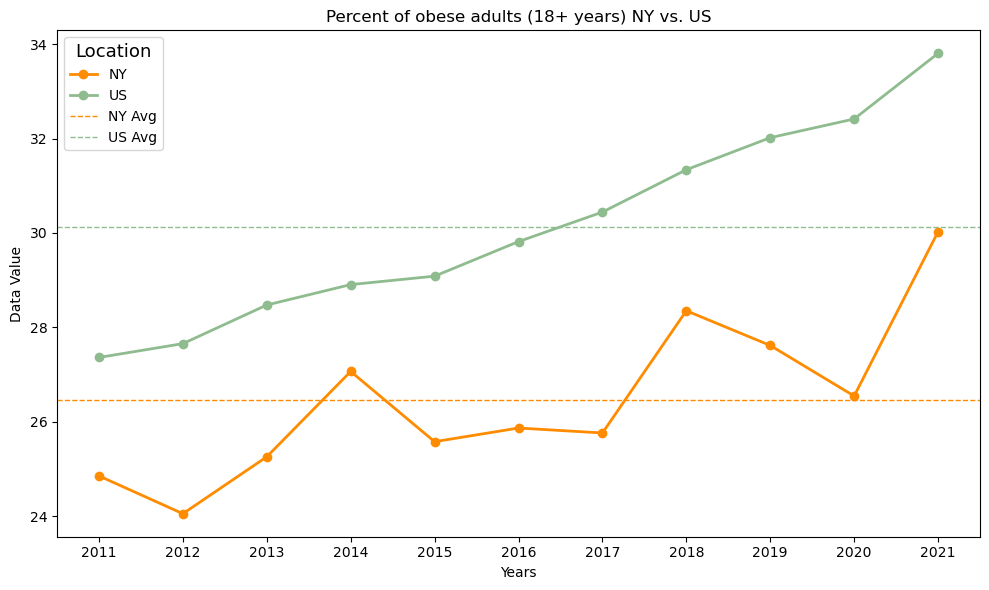

In [181]:
#vizualize data in chart
#extract data from the DataFrame
years = lineplot2['Year']
ny_data = lineplot2['NY']
us_data = lineplot2['US']

plt.figure(figsize=(10, 6), tight_layout=True)
#plotting
plt.plot(years, ny_data, 'o-', label='NY', linewidth=2, color='darkorange')
plt.plot(years, us_data, 'o-', label='US', linewidth=2, color='darkseagreen')

#calculate the average values
ny_avg = ny_data.mean()
us_avg = us_data.mean()

#add horizontal lines for the averages
plt.axhline(y=ny_avg, color='darkorange', linestyle='--', label='NY Avg', linewidth=1)
plt.axhline(y=us_avg, color='darkseagreen', linestyle='--', label='US Avg', linewidth=1)

#customization
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Data Value')
plt.title('Percent of obese adults (18+ years) NY vs. US')
plt.legend(title='Location', title_fontsize=13)

plt.show()

In [159]:
#create new DataFrame with the data of obese and overweighted adults in NY & the US
#create data frame
lineplot3 = pd.DataFrame({'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021
                                  ],
                                        
                   'NY_Overweight': [35.352000, 36.932000, 35.876923, 33.716000, 33.888462, 34.518519, 34.969231, 
                                     34.478571, 35.637037, 35.600000, 34.437037],
                    
                   'US_Overweight': [35.296429, 35.210714, 34.892857, 34.428571, 35.221429, 34.496429, 34.496429, 
                                     34.417857, 34.485714, 34.171429, 33.889286],

                   'NY_Obesity': [24.856000, 24.056000, 25.261538, 27.068000, 25.580769, 25.870370, 25.765385, 
                                  28.353571, 27.618519, 26.548148, 30.025926],
                    
                   'US_Obesity': [27.364286, 27.657143, 28.475000, 28.907143, 29.085714, 29.817857, 30.442857, 
                                  31.339286, 32.017857, 32.414286, 33.803571
                          ]}) 
#print DataFrame
display(lineplot3)

,Year,NY_Overweight,US_Overweight,NY_Obesity,US_Obesity
0,2011,35.352000,35.296429,24.856000,27.364286
1,2012,36.932000,35.210714,24.056000,27.657143
2,2013,35.876923,34.892857,25.261538,28.475000
3,2014,33.716000,34.428571,27.068000,28.907143
4,2015,33.888462,35.221429,25.580769,29.085714
5,2016,34.518519,34.496429,25.870370,29.817857
6,2017,34.969231,34.496429,25.765385,30.442857
7,2018,34.478571,34.417857,28.353571,31.339286
8,2019,35.637037,34.485714,27.618519,32.017857
9,2020,35.600000,34.171429,26.548148,32.414286


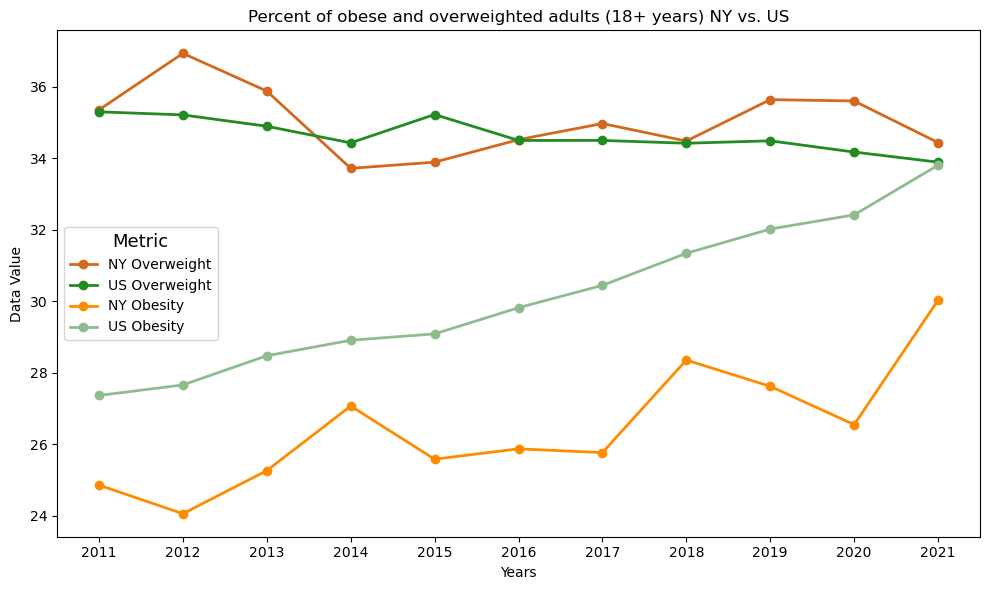

In [184]:
#vizualize previous data
#extract data from the DataFrame
years = lineplot3['Year']
obesity_ny_data = lineplot3['NY_Obesity']
obesity_us_data = lineplot3['US_Obesity']
overweight_ny_data = lineplot3['NY_Overweight']
overweight_us_data = lineplot3['US_Overweight']

plt.figure(figsize=(10, 6), tight_layout=True)
#plotting
plt.plot(years, overweight_ny_data, 'o-', label='NY Overweight', linewidth=2, color='chocolate')
plt.plot(years, overweight_us_data, 'o-', label='US Overweight', linewidth=2, color='forestgreen')
plt.plot(years, obesity_ny_data, 'o-', label='NY Obesity', linewidth=2, color='darkorange')
plt.plot(years, obesity_us_data, 'o-', label='US Obesity', linewidth=2, color='darkseagreen')

#customization
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Data Value')
plt.title('Percent of obese and overweighted adults (18+ years) NY vs. US')
plt.legend(title='Metric', title_fontsize=13)

plt.show()

In [169]:
#create new DataFrame with the data of obese and overweighted adults in NY
#create data frame
lineplot4 = pd.DataFrame({'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021
                                  ],
                                        
                   'NY_Overweight': [35.352000, 36.932000, 35.876923, 33.716000, 33.888462, 34.518519, 34.969231, 
                                     34.478571, 35.637037, 35.600000, 34.437037],

                   'NY_Obesity': [24.856000, 24.056000, 25.261538, 27.068000, 25.580769, 25.870370, 25.765385, 
                                  28.353571, 27.618519, 26.548148, 30.025926
                          ]}) 
#print DataFrame
display(lineplot4)

,Year,NY_Overweight,NY_Obesity
0,2011,35.352000,24.856000
1,2012,36.932000,24.056000
2,2013,35.876923,25.261538
3,2014,33.716000,27.068000
4,2015,33.888462,25.580769
5,2016,34.518519,25.870370
6,2017,34.969231,25.765385
7,2018,34.478571,28.353571
8,2019,35.637037,27.618519
9,2020,35.600000,26.548148


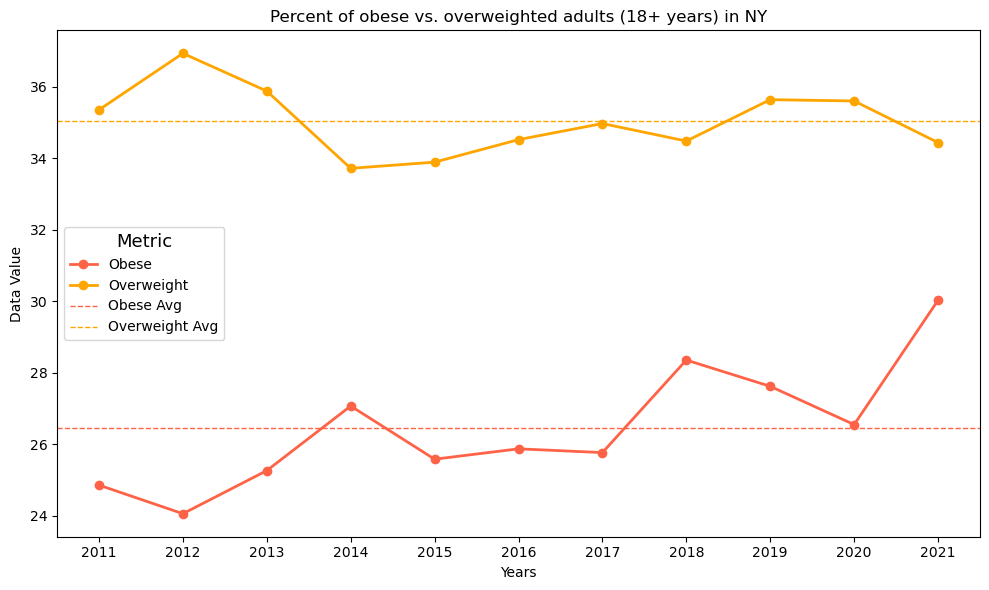

In [185]:
#vizualize previous data
#extract data from the DataFrame
years = lineplot4['Year']
ny_data1 = lineplot4['NY_Obesity']
ny_data2 = lineplot4['NY_Overweight']

plt.figure(figsize=(10, 6), tight_layout=True)
#plotting
plt.plot(years, ny_data1, 'o-', label='Obese', linewidth=2, color='tomato')
plt.plot(years, ny_data2, 'o-', label='Overweight', linewidth=2, color='orange')

#calculate the average values
ny_avg1 = ny_data1.mean()
ny_avg2 = ny_data2.mean()

#add horizontal lines for the averages
plt.axhline(y=ny_avg1, color='tomato', linestyle='--', label='Obese Avg', linewidth=1)
plt.axhline(y=ny_avg2, color='orange', linestyle='--', label='Overweight Avg', linewidth=1)

#customization
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Data Value')
plt.title('Percent of obese vs. overweighted adults (18+ years) in NY')
plt.legend(title='Metric', title_fontsize=13)

plt.show()

In [174]:
#create new DataFrame with the data of obese and overweighted adults in the US
#create data frame
lineplot5 = pd.DataFrame({'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021
                                  ],
                    
                   'US_Overweight': [35.296429, 35.210714, 34.892857, 34.428571, 35.221429, 34.496429, 34.496429, 
                                     34.417857, 34.485714, 34.171429, 33.889286],
                    
                   'US_Obesity': [27.364286, 27.657143, 28.475000, 28.907143, 29.085714, 29.817857, 30.442857, 
                                  31.339286, 32.017857, 32.414286, 33.803571
                          ]}) 
#print DataFrame
display(lineplot5)

,Year,US_Overweight,US_Obesity
0,2011,35.296429,27.364286
1,2012,35.210714,27.657143
2,2013,34.892857,28.475000
3,2014,34.428571,28.907143
4,2015,35.221429,29.085714
5,2016,34.496429,29.817857
6,2017,34.496429,30.442857
7,2018,34.417857,31.339286
8,2019,34.485714,32.017857
9,2020,34.171429,32.414286


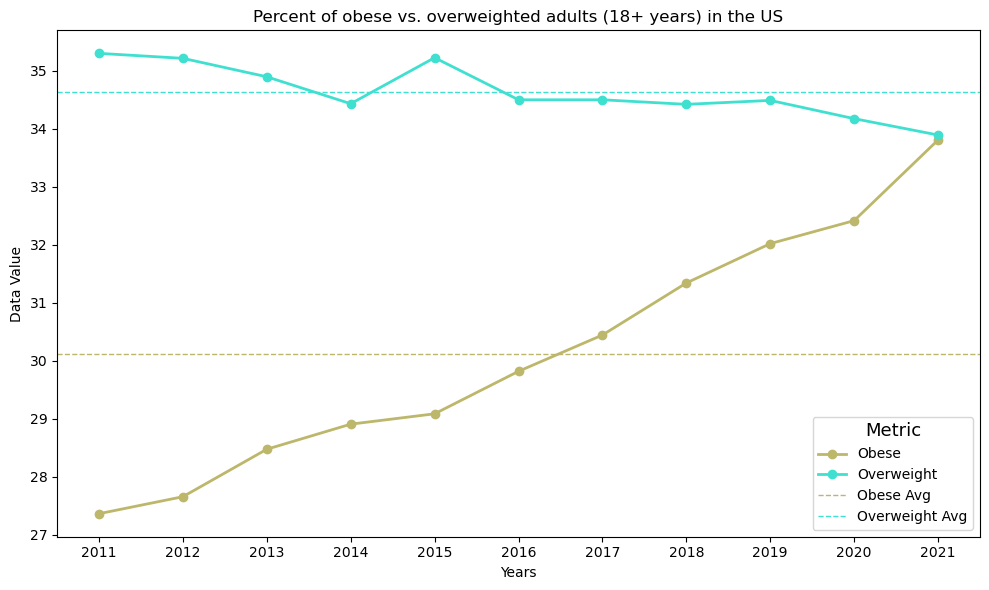

In [186]:
#vizualize previous data
#extract data from the DataFrame
years = lineplot5['Year']
us_data1 = lineplot5['US_Obesity']
us_data2 = lineplot5['US_Overweight']

plt.figure(figsize=(10, 6), tight_layout=True)
#plotting
plt.plot(years, us_data1, 'o-', label='Obese', linewidth=2, color='darkkhaki')
plt.plot(years, us_data2, 'o-', label='Overweight', linewidth=2, color='turquoise')

#calculate the average values
us_avg1 = us_data1.mean()
us_avg2 = us_data2.mean()

#add horizontal lines for the averages
plt.axhline(y=us_avg1, color='darkkhaki', linestyle='--', label='Obese Avg', linewidth=1)
plt.axhline(y=us_avg2, color='turquoise', linestyle='--', label='Overweight Avg', linewidth=1)

#customization
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Data Value')
plt.title('Percent of obese vs. overweighted adults (18+ years) in the US')
plt.legend(title='Metric', title_fontsize=13)

plt.show()

In [ ]:
#Conclusions: 
#2021 was the year with the highest average of obese people both in NY and the US.
#Within the 2011-2021 period, the average of obese New Yorkers was lower than the national average.
#2012 was the year with the highest average of overweighted people in NY, while nationally, 
#but not by much, was 2011.
#Within the 2011-2021 period, the average of overweighted New Yorkers was slightly higher than the national average.
#Overall, there is a clear rising trend in the "obese adults" category in the country.